In [27]:
import pandas as pd
import seaborn as sns
import numpy as np 
import sys as sys
from io import StringIO 
import zipfile
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

# open zipped dataset
with zipfile.ZipFile("PregnancyData.zip") as z:
   # open the csv file in the dataset
   with z.open("PregnancyData.csv") as f:
     # read the dataset
      df = pd.read_csv(f)

In [2]:
import os

PROJECT_ROOT_DIR = "."
MODEL_ID = ""
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", MODEL_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [4]:
df.columns[df.isnull().any()]

Index(['Date patient started trying to become pregnant OR date of last pregnancy',
       'Main Reason for Producing Embroys Storing Eggs',
       'Type of Ovulation Induction', 'Egg Donor Age at Registration',
       'Sperm Donor Age at Registration', 'Donated embryo',
       'Patient acting as Surrogate', 'PGD', 'PGD treatment', 'PGS',
       'PGS Treatment', 'Elective Single Embryo Transfer', 'Egg Source',
       'Fresh Cycle', 'Frozen Cycle', 'Eggs Thawed', 'Fresh Eggs Collected',
       'Fresh Eggs Stored', 'Total Eggs Mixed',
       'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm',
       'Total Embryos Created', 'Eggs Micro-injected',
       'Embryos from Eggs Micro-injected', 'Total Embryos Thawed',
       'Embryos Transfered', 'Embryos Transfered from Eggs Micro-injected',
       'Embryos Stored For Use By Patient',
       'Embryos (from Eggs Micro-injected) Stored For Use By Patient',
       'Date of Egg Collection', 'Date of Egg Thawing', 'Date of Egg Mixing',


<AxesSubplot:>

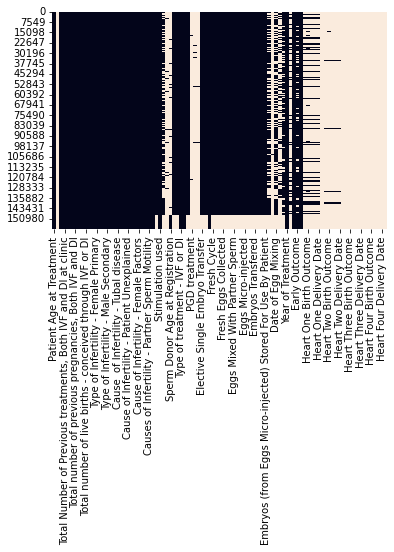

In [5]:
#Heatmap of missing data
sns.heatmap(df.isnull(), cbar=False)

In [6]:
# Getting the list of columns
col = df.columns
  
# Printing Number of columns
print('Original number of columns :', len(col))

# Delete columns containing either 6% or more than 6% NaN Values
perc = 6.0
min_count = int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, thresh=min_count, how = 'any')
col_mod = mod_df.columns

# Adding new Embryos Transfered column to mod_df from df
mod_df['Embryos Transfered'] = df['Embryos Transfered']

print('New number of columns :', len(col_mod))
print(mod_df.columns)

Original number of columns : 95
New number of columns : 35
Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infer

In [7]:
# obtaining the shape and size of mod_df after removing and adding columns 
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (158519, 36)


Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility 

In [8]:
# Dropping more columns
mod_df.drop('Total Number of Previous cycles, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total Number of Previous treatments, Both IVF and DI at clinic', axis=1, inplace = True)
mod_df.drop('Total Number of Previous DI cycles', axis=1, inplace = True)
mod_df.drop('Total number of previous pregnancies, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total number of DI pregnancies', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through IVF or DI', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through DI', axis=1, inplace = True)
mod_df.drop('Type of treatment - IVF or DI', axis=1, inplace = True)
mod_df.drop('Year of Treatment', axis=1, inplace = True)
mod_df.drop('Cause of Infertility - Partner Sperm Concentration', axis=1, inplace = True)
mod_df.drop('Cause of Infertility - Female Factors', axis=1, inplace = True)
mod_df.drop('Causes of Infertility - Partner Sperm Motility', axis=1, inplace = True)
mod_df.drop('Cause of Infertility -  Partner Sperm Immunological factors', axis=1, inplace = True)
mod_df.drop('Specific treatment type', axis=1, inplace = True)

# obtaining the shape and size of mod_df after removing more columns 
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (158519, 22)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used',
       'Sperm From', 'Number of Live Births',
       'Number of foetal sacs with fetal pulsation', 'Embryos Transfered'],
      dtype='object')

In [9]:
print(mod_df.nunique())

Patient Age at Treatment                                7
Total Number of Previous IVF cycles                     7
Total number of IVF pregnancies                        12
Total number of live births - conceived through IVF     6
Type of Infertility - Female Primary                    2
Type of Infertility - Female Secondary                  2
Type of Infertility - Male Primary                      2
Type of Infertility - Male Secondary                    2
Type of Infertility -Couple Primary                     2
Type of Infertility -Couple Secondary                   2
Cause  of Infertility - Tubal disease                   2
Cause of Infertility - Ovulatory Disorder               2
Cause of Infertility - Male Factor                      2
Cause of Infertility - Patient Unexplained              2
Cause of Infertility - Endometriosis                    2
Cause of Infertility - Cervical factors                 2
Cause of Infertility -  Partner Sperm Morphology        2
Stimulation us

In [10]:
# Show each unique value in every column
for col in mod_df:
    print(col)
    print(mod_df[col].unique())

Patient Age at Treatment
['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39' '999']
Total Number of Previous IVF cycles
['2' '3' '0' '5' '4' '1' '>=5']
Total number of IVF pregnancies
[0 1 2 4 3 5 '0' '1' '2' '3' '4' '>=5']
Total number of live births - conceived through IVF
[0 1 2 3 5 4]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Sperm From
['Partner' 'Donor' 'not assigned' 'Partner & Donor']
Number of Live Births
[1 0 2 3 4]
Number

In [11]:
# Fixing outliers and errors in data
mod_df.drop(mod_df.index[mod_df['Patient Age at Treatment'] == '999'], inplace = True)
mod_df.drop(mod_df.index[mod_df['Number of foetal sacs with fetal pulsation'] == 40], inplace = True)
mod_df.drop(mod_df.index[mod_df['Sperm From'] == 'not assigned'], inplace = True)
mod_df['Patient Age at Treatment'].replace({'40-42': 41, '45-50': 47.5, '35-37': 36, '18 - 34': 26, '43-44': 43.5, '38-39': 38.5}, inplace=True)
mod_df['Total Number of Previous IVF cycles'].replace({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '>=5': 6}, inplace=True)
mod_df['Total number of IVF pregnancies'].replace({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '>=5': 6}, inplace=True)
mod_df['Sperm From'].replace({'Partner': 0, 'Donor': 1, 'Partner & Donor': 2}, inplace=True)
mod_df['Patient Age at Treatment'].replace({'40-42': 0, '45-50': 1, '35-37': 2, '18 - 34': 3, '43-44': 4, '38-39': 5}, inplace=True)
# mod_df['Total number of live births - conceived through IVF'].replace({2: 1, 3: 1, 4: 1, 5: 1}, inplace=True)
mod_df.fillna(value=mod_df['Embryos Transfered'].mean(), inplace=True)

In [12]:
# Checking each unique value in every column
for col_up in mod_df:
    print(col_up)
    print(mod_df[col_up].unique())

Patient Age at Treatment
[41.  47.5 36.  26.  43.5 38.5]
Total Number of Previous IVF cycles
[2 3 0 5 4 1 6]
Total number of IVF pregnancies
[0 1 2 4 3 5 6]
Total number of live births - conceived through IVF
[0 1 2 3 5 4]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Sperm From
[0 1 2]
Number of Live Births
[1 0 2 3 4]
Number of foetal sacs with fetal pulsation
[1 0 2 3 4]
Embryos Transfered
[1.         2.         0.         3.       

In [13]:
# obtaining the shape and size of mod_df after fixing outliers and errors in data
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (156025, 22)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used',
       'Sperm From', 'Number of Live Births',
       'Number of foetal sacs with fetal pulsation', 'Embryos Transfered'],
      dtype='object')

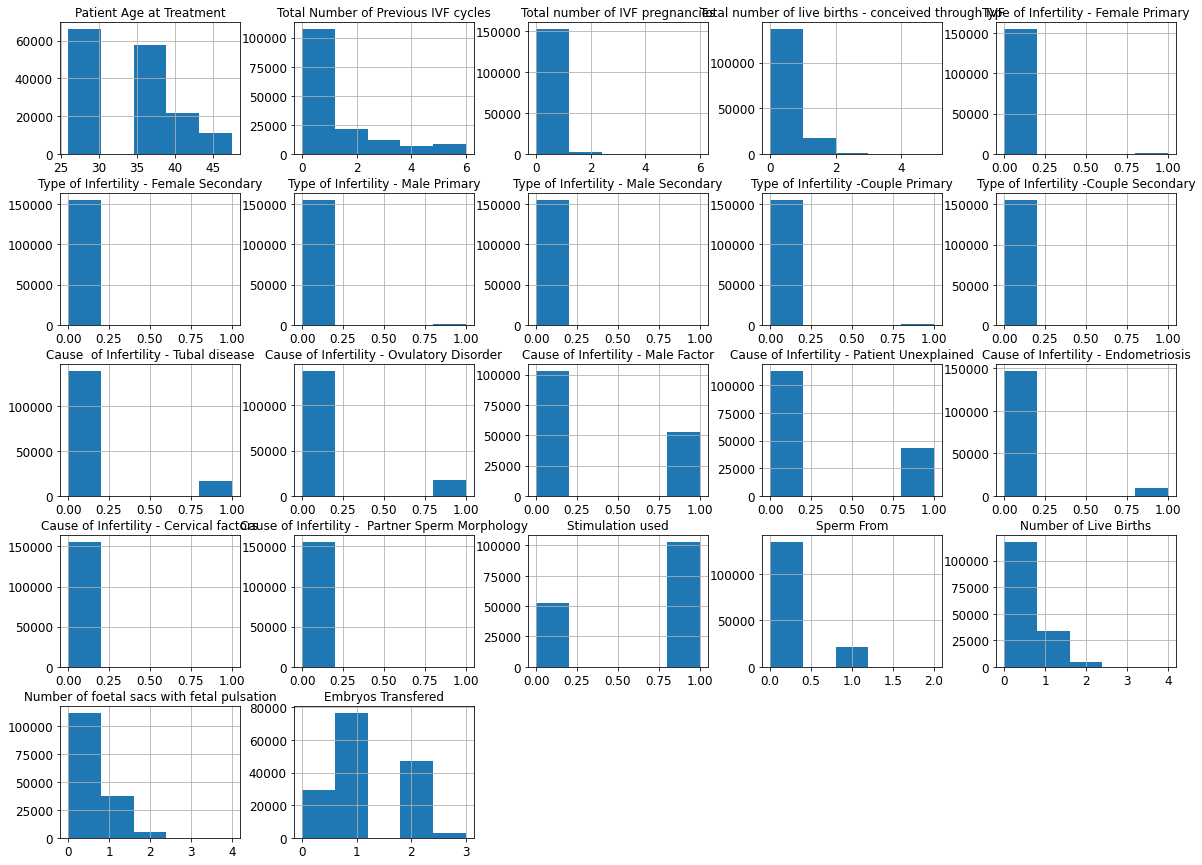

In [14]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mod_df.hist(bins=5, figsize=(20,15))
plt.show()

<AxesSubplot:>

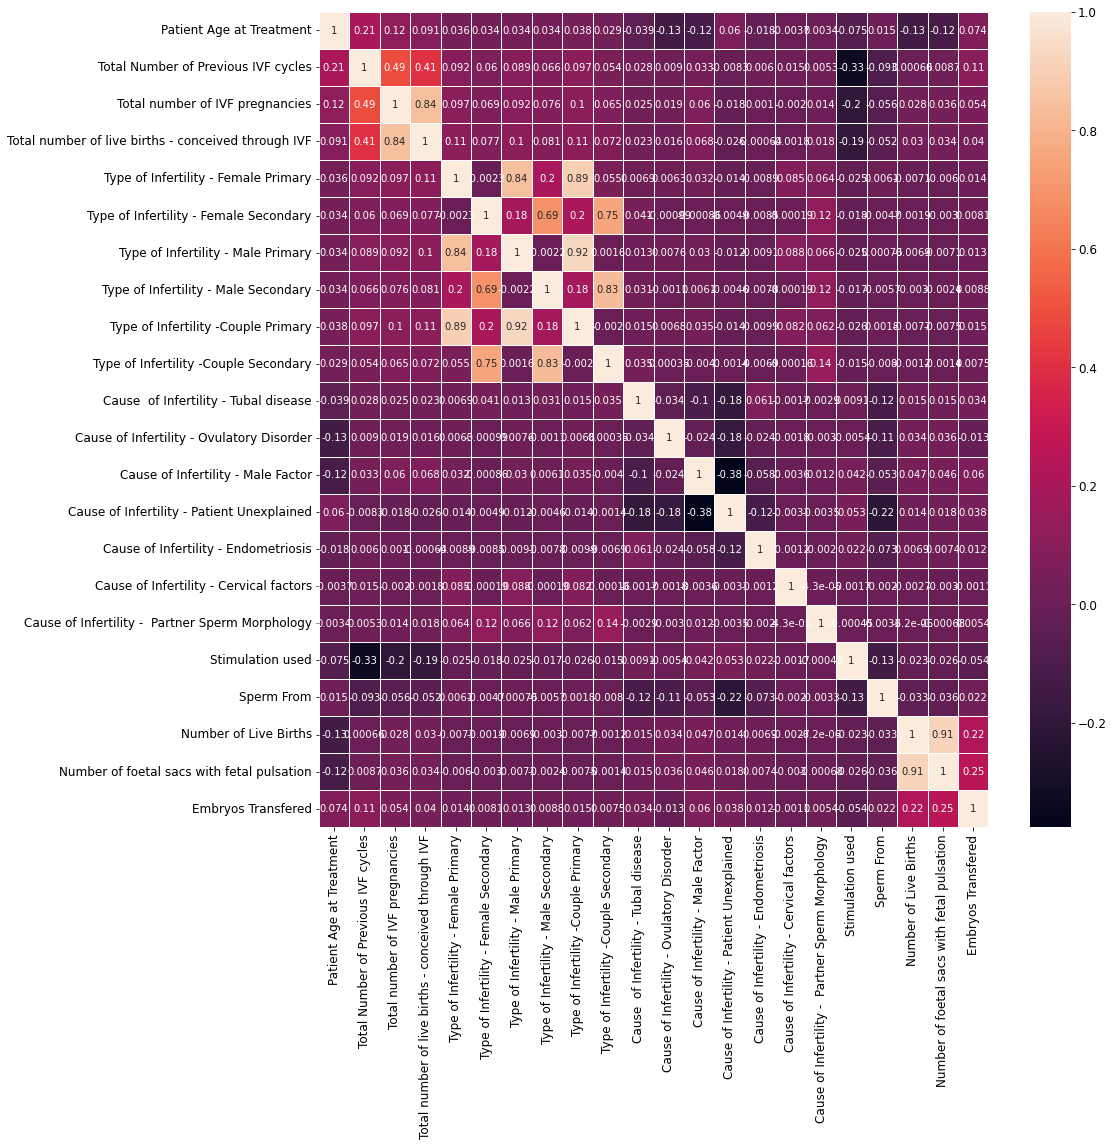

In [15]:
fig, ax = plt.subplots(figsize=(15,15))  # Sample figsize in inches
sns.heatmap(mod_df.corr(), annot=True, linewidths=.5, ax=ax)

In [16]:
# Add a new column named 'LiveBirth'
mod_df['LiveBirth'] = [1 if x >= 1 else 0 for x in mod_df['Total number of live births - conceived through IVF']]
# mod_df['Pregnant'] = [1 if x >= 1 else 0 for x in mod_df['Total number of IVF pregnancies']]

# Print number of 0s and 1s in target column
print('Live Briths:')
print(mod_df['LiveBirth'].value_counts())
# print('Preganancies:')
# print(mod_df['Pregnant'].value_counts())

Live Briths:
0    137162
1     18863
Name: LiveBirth, dtype: int64


In [17]:
#target_columns 
Y = ['Total number of live births - conceived through IVF', 'Number of Live Births', 'LiveBirth']
#Y = ['Total number of live births - conceived through IVF', 'Number of Live Births', 'LiveBirth', 'Pregnant']
y = ['LiveBirth']
#feature_columns 
x = [c for c in mod_df.columns if c not in Y]

print(y)
print(x)

#target_columns 
remove = ['Total number of live births - conceived through IVF', 'Number of Live Births', 'LiveBirth', 
          'Total number of IVF pregnancies']
target = ['Total number of IVF pregnancies']

# remove = ['Total number of live births - conceived through IVF', 'Number of Live Births', 'LiveBirth', 
#           'Total number of IVF pregnancies', 'Pregnant']
# target = ['Pregnant']
#feature_columns 
feature = [col for col in mod_df.columns if col not in remove]

print(target)
print(feature)

['LiveBirth']
['Patient Age at Treatment', 'Total Number of Previous IVF cycles', 'Total number of IVF pregnancies', 'Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary', 'Type of Infertility - Male Primary', 'Type of Infertility - Male Secondary', 'Type of Infertility -Couple Primary', 'Type of Infertility -Couple Secondary', 'Cause  of Infertility - Tubal disease', 'Cause of Infertility - Ovulatory Disorder', 'Cause of Infertility - Male Factor', 'Cause of Infertility - Patient Unexplained', 'Cause of Infertility - Endometriosis', 'Cause of Infertility - Cervical factors', 'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used', 'Sperm From', 'Number of foetal sacs with fetal pulsation', 'Embryos Transfered']
['Total number of IVF pregnancies']
['Patient Age at Treatment', 'Total Number of Previous IVF cycles', 'Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary', 'Type of Infertility - Male Primary', 'Type of Inf

In [18]:
X_train, X_test, y_train, y_test = train_test_split(mod_df[x], mod_df[y], test_size=0.2, random_state=0, stratify = mod_df[y])

In [19]:
X_train.to_csv('train_binary_x.csv', index=False)
y_train.to_csv('train_binary_y.csv', index=False)
X_test.to_csv('test_binary_x.csv', index=False)
y_test.to_csv('test_binary_y.csv', index=False)

In [20]:
# Using smote to resample the target data
smt = SMOTE(random_state = 100, sampling_strategy = 1.0)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [21]:
print(y_train_smt.value_counts())

LiveBirth
0            109730
1            109730
dtype: int64


In [22]:
X_train = pd.read_csv('train_binary_x.csv')
y_train = pd.read_csv('train_binary_y.csv')
X_test = pd.read_csv('test_binary_x.csv')

In [23]:
# Fine tuning hyperparameters for RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [400, 500, 600], 'max_features': [4]},
    {'bootstrap': [False], 'n_estimators': [400, 500, 600], 'max_features': [4]}]


forest_cl = RandomForestClassifier(random_state=42, criterion='entropy')

grid_search = GridSearchCV(forest_cl, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)



grid_search.fit(X_train, y_train)

grid_search.best_params_


{'max_features': 4, 'n_estimators': 400}

In [26]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = RandomForestClassifier(random_state=42, verbose=1)
clf.fit(X_train, y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.savefig("warmstart_plots/pure_SGD:"+str(kwargs)+".png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.close()

'gini'

In [24]:
# Using estimated hyperparameters to train RandomForestClassifier
# Getting Accuracy score

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

forest_cl.max_features = 4   #used 6 first, then 4, then 4
forest_cl.n_estimators = 500 # used 30 first, then 500, then 800

forest_cl.fit(X_train, y_train)

y_pred = forest_cl.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Clasification report: \n', classification_report(y_test, y_pred, digits=6))

Confusion matrix: 
 [[26408  1024]
 [  273  3500]]
Clasification report: 
               precision    recall  f1-score   support

           0   0.989768  0.962671  0.976032     27432
           1   0.773652  0.927644  0.843678      3773

    accuracy                       0.958436     31205
   macro avg   0.881710  0.945158  0.909855     31205
weighted avg   0.963637  0.958436  0.960029     31205



In [25]:
y_pred = forest_cl.predict_proba(X_test)

for idx, pred in enumerate(y_pred):
    print(f"{idx}, {pred[1]}")
    
fp = open("result-RandomForrest-0.957539.txt", "w")
fp.write("index, score\n")
for idx, pred in enumerate(y_pred):
    fp.write(f"{idx}, {pred[1]}\n")

0, 0.0
1, 0.0
2, 0.0
3, 0.8593531579630715
4, 0.0
5, 0.0
6, 0.0
7, 0.0
8, 0.0
9, 0.0
10, 0.0
11, 0.0
12, 0.0
13, 0.0
14, 0.0
15, 0.0
16, 0.8362314505677244
17, 0.5321378787878788
18, 0.0
19, 0.0
20, 0.0
21, 0.0
22, 0.0
23, 0.0
24, 0.0
25, 0.0
26, 0.0
27, 0.0
28, 0.0
29, 0.046
30, 0.6609437812187815
31, 0.5029170893434053
32, 0.0
33, 0.0
34, 0.0
35, 0.0
36, 0.0
37, 0.0
38, 0.0
39, 0.0
40, 0.0
41, 0.0
42, 0.0
43, 0.5141885531135533
44, 0.0
45, 0.0
46, 0.6359666666666666
47, 0.0
48, 0.0
49, 0.0
50, 0.7446002826223594
51, 0.9796476190476191
52, 0.0
53, 0.0
54, 0.0
55, 0.0
56, 0.9257148152990434
57, 0.0
58, 0.0
59, 0.9925666666666667
60, 0.0
61, 0.0
62, 0.0
63, 0.0
64, 0.0
65, 0.0
66, 0.0
67, 0.0
68, 0.971
69, 0.0
70, 0.0
71, 0.7083617666904818
72, 0.0
73, 0.7861444000443994
74, 0.0
75, 0.0
76, 0.0
77, 0.004
78, 0.0
79, 0.0
80, 0.0
81, 0.0
82, 0.5291128392739036
83, 0.0
84, 0.0
85, 0.006
86, 0.0
87, 0.7436097723043441
88, 0.0
89, 0.002
90, 0.0
91, 0.0
92, 0.0
93, 0.5443294565012681
94, 0.0


In [25]:
# Fine tuning hyperparameters for ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

param_grid = [
    {'n_estimators': [800, 1000, 1200], 'max_features': [2, 3, 4], 'max_depth': 10, 'max_leaf_nodes': 200},
    {'bootstrap': [False], 'n_estimators': [800, 1000, 1200], 'max_features': [2, 3, 4], 'max_depth': 10, 'max_leaf_nodes': 200}]

extra_trees_cl = ExtraTreesClassifier(random_state=42, criterion='entropy')

crit = extra_trees_cl.criterion;

grid_search = GridSearchCV(extra_trees_cl, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

grid_search.best_params_

print(crit)

{'bootstrap': False, 'max_features': 4, 'n_estimators': 200}

In [26]:
# Using estimated hyperparameters to train ExtraTreesClassifier
# Getting Accuracy score

extra_trees_cl.bootstrap = False
extra_trees_cl.max_features = 4
extra_trees_cl.n_estimators = 100

extra_trees_cl.fit(X_train, y_train)

y_pred = extra_trees_cl.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_pred, y_test))
print('Clasification report: \n', classification_report(y_test, y_pred, digits=6))

Confusion matrix: 
 [[26471   430]
 [  961  3343]]
Clasification report: 
               precision    recall  f1-score   support

           0   0.984015  0.964968  0.974399     27432
           1   0.776719  0.886032  0.827783      3773

    accuracy                       0.955424     31205
   macro avg   0.880367  0.925500  0.901091     31205
weighted avg   0.958951  0.955424  0.956671     31205



In [ ]:
y_pred = extra_trees_cl.predict_proba(X_test)

for idx, pred in enumerate(y_pred):
    print(f"{idx}, {pred[1]}")
    
fp = open("result-ExtraTrees-0.955424.txt", "w")
fp.write("index, score\n")
for idx, pred in enumerate(y_pred):
    fp.write(f"{idx}, {pred[1]}\n")